# Experiment No.: 2 {-}

\medskip \medskip \medskip \medskip \medskip

## **Name:** *Kunal Ghosh* {-}

## **Course:** *M.Tech. (Course-Based)* {-}

## **Experiment:** *Schlieren at Hypersonic Mach numbers* {-}

## **SAP no.:** *6000007645* {-}

## **SR No.:** *05-01-00-10-42-22-1-21061* {-}

\newpage

# **Question 1:** {-}

What is the dominant time period T of the shock wave unsteadiness that you see in the schlieren data? Provide details on how you arrived at the estimate.

# **Answer:** {-}

We are provided with a grayscale video of schlieren (“schlieren.avi”). In this video, we can see a shockwave oscillating in the flow field. So, we need to capture the pixels representing the shock in the frames of the video.

# Note: {-}

1. An image is digitally stored as a 2D matrix (dimensions being that of the width and height of the image) in the case of a grayscale image and a 3D matrix (the first two dimensions is that of the width and height of the image, while the third one is that of the pixel value in BGR (Blue-Green-Red) or some other format with three components) in case of a colour image.
1. A video has the same number of dimensions as that of the frames along with the temporal dimension. That is three dimensions for the grayscale video and four dimensions for the colour video.


# **Algorithm:** {-}

* **Step 1:** Get the first frame of the video.
* **Step 2:** Get the first column of this frame.
* **Step 3:** Set a threshold value of the pixel for identifying a pixel representing a shock wave.
* **Step 4:** Start searching for the values of the pixels greater than or equal to the threshold value decided from the top of the column. If found then mark that pixel and check whether it is coinciding with the shock wave or not. If not, then change the threshold value and repeat this step. 
* **Step 5:** Only the first pixel in the column is to be marked, then go to the next step.
* **Step 6:** Repeat this for all the remaining columns in the frame. (Threshold value is to be set only for the first column of the first frame of the video.)
* **Step 7:** Repeat step 4 and step 5 unless it is the last frame of the video. 
* **Step 8:** Now perform the FFT (Fast Fourier Transform) for each of the columns and plot it along with the corresponding frequencies in a semilog graph.
* **Step 9:** Identify the peak in this graph. This is the dominant time period, T. (We have taken the mode of this data for peaks at different horizontal locations, though all of it is giving the same frequency)

# **Code:** {-}

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Sep  2 19:43:50 2022

@author: Kunal Ghosh
"""


'\nCreated on Fri Sep  2 19:43:50 2022\n\n@author: Kunal Ghosh\n'

Importing the required libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from IPython.display import Video
from IPython.display import Image

Reading the given video file

In [3]:
schlieren_video = cv2.VideoCapture("schlieren.avi")

Getting the frame rate of the video

In [4]:
fps = schlieren_video.get(cv2.CAP_PROP_FPS)

Getting the width and height of the video

In [5]:
Width = int(schlieren_video.get(cv2.CAP_PROP_FRAME_WIDTH))
Height = int(schlieren_video.get(cv2.CAP_PROP_FRAME_HEIGHT))
size = (Width,Height)

Getting the number of the frames in the given video

In [6]:
Num_Frames = int(schlieren_video.get(cv2.CAP_PROP_FRAME_COUNT))

Extracting the each individual frame

In [7]:
Channels = 1
Frames_Data = np.zeros((size[1],size[0],Num_Frames),dtype=np.uint8)
Frames_Data_Detect = np.zeros((size[1],size[0],Num_Frames),dtype=np.uint8)
for i in range(0,Num_Frames,1):
    
    # Reading the frames of the videos
    success, frame = schlieren_video.read()
    
    # Converting to the grayscale
    frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
    # Storing the image in a numpy array
    Frames_Data[:,:,i] = np.array(frame,dtype=np.uint8)

Marking the pixels having pixel value more than threshold pixel value

In [8]:
Threshhold_Pixel_Value = 125
Frames_Data_Detect = np.where(Frames_Data>Threshhold_Pixel_Value,1,0)
Frames_Data_Detect_Shock_Marker = np.zeros((size[1],size[0],Num_Frames),dtype=np.uint8)

First detected pixel location along the column for all columns and frames

In [9]:
y_loc_shock = np.argmax(Frames_Data_Detect == 1,axis=0)

Marking those pixels as 1 and others as 0 (As all pixels are intialized as 0)

In [10]:
for i in range(0,Num_Frames,1):
    for col in range(0,Width,1):
        Frames_Data_Detect_Shock_Marker[y_loc_shock[col][i],col,i] = 1

Declaring the output video as "Output_Video_Shock.mp4" to visualize which pixels where marked

In [11]:
Output_Video_Shock  = "Output_Video_Shock.mp4"
output_video = cv2.VideoWriter(Output_Video_Shock, cv2.VideoWriter_fourcc(*'mp4v'),fps, size)

Creating the frames for the output video to visualize which pixels where marked

In [12]:
Frames_Data_Output = np.zeros((size[1],size[0],3,Num_Frames),dtype=np.uint8)

Writing the frames as a output video to visualize which pixels where marked

In [13]:
for i in range(0,Num_Frames,1):
    
    # Converting grayscale image back to the BGR format
    Frames_Data_Output[:,:,:,i] = cv2.cvtColor(Frames_Data[:,:,i],cv2.COLOR_GRAY2BGR)
    
    # Coloring the detected pixel value (as green colour)
    Frames_Data_Output[:,:,0,i] = np.where(Frames_Data_Detect_Shock_Marker[:,:,i] == 1,0,Frames_Data_Output[:,:,0,i])
    Frames_Data_Output[:,:,1,i] = np.where(Frames_Data_Detect_Shock_Marker[:,:,i] == 1,255,Frames_Data_Output[:,:,1,i])
    Frames_Data_Output[:,:,2,i] = np.where(Frames_Data_Detect_Shock_Marker[:,:,i] == 1,0,Frames_Data_Output[:,:,2,i])
    
    # Writing the frame as output video
    output_video.write(Frames_Data_Output[:,:,:,i])

In [14]:
print("Shock detection video should be generated.")
print(f"Name of the video file {Output_Video_Shock}")

Shock detection video should be generated.
Name of the video file Output_Video_Shock.mp4


In [15]:
Fs = 8000
f = Fs*np.arange((Num_Frames)/2)/Num_Frames;
delt=1/Fs;
Tv=delt*np.arange(Num_Frames)

Plotting the displacement of the shock at all locations along horizontal axis

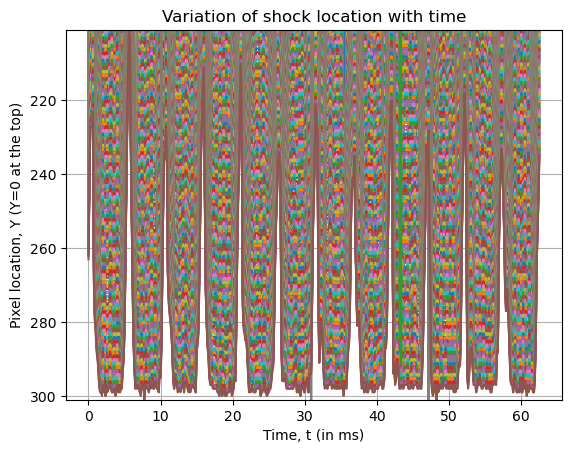

In [16]:
fig = plt.figure()
for i in range(0,Width,1):
    plt.plot(Tv*1000,y_loc_shock[i,:])
    plt.ylim(max(y_loc_shock[i,:]),min(y_loc_shock[i,:]))
plt.grid(which="both")
plt.xlabel('Time, t (in ms)')
plt.ylabel('Pixel location, Y (Y=0 at the top)')
plt.title('Variation of shock location with time')
plt.show()
fig.savefig("Displacement_all_location.png")

It's not possible to understand any thing from this plot

We will be plotting at fewer location to see the displacements

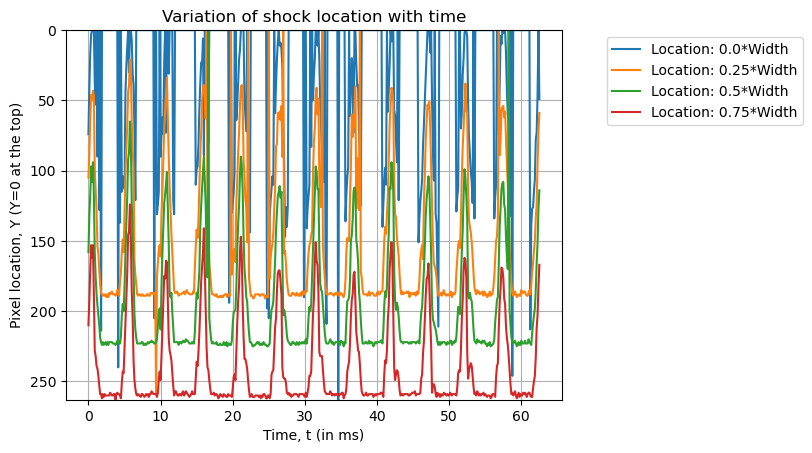

In [17]:
num_loc_displacements = 4
fig = plt.figure()
y_loc_legend = []
for i in range(0,Width,int(Width/(num_loc_displacements))):
    plt.plot(Tv*1000,y_loc_shock[i,:])
    plt.ylim(max(y_loc_shock[i,:]),min(y_loc_shock[0,:]))
    y_loc_legend.append("Location: "+str(float(i/Width))+"*Width")
plt.legend([])
plt.grid(which="both")
plt.xlabel('Time, t (in ms)')
plt.ylabel('Pixel location, Y (Y=0 at the top)')
plt.title('Variation of shock location with time')
plt.legend(y_loc_legend,bbox_to_anchor=(1.5, 1), loc="upper right")
plt.show()
fig.savefig("Displacement_"+str(num_loc_displacements+1)+"_location.png",bbox_inches='tight')

Performing FFT (Fast Fourier Transform) to get the frequencies at all the locations

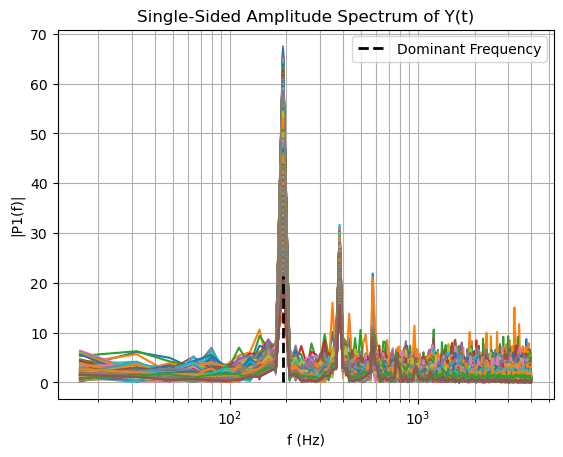

In [18]:
Y_all_col = np.fft.fft(y_loc_shock, axis=1);
col_max_freq = np.zeros(Width)
col_max_freq_2 = np.zeros(Width)
fig = plt.figure()    
# Plotting for different location along the horizontal axis
for i in range(0,Width,1):
    Y = Y_all_col[i,:];
    P2 = abs(Y/Num_Frames);
    P1 = P2[0:np.int64((Num_Frames+1)/2)];
    P1[1:-1] = 2*P1[1:-1];
    col_max_freq[i] = f[np.where(P1 == P1[1:].max())]
    plt.semilogx(f[1:],P1[1:],label="_nolegend_")

plt.grid(which = "both")
plt.title('Single-Sided Amplitude Spectrum of Y(t)')
plt.xlabel('f (Hz)')
plt.ylabel('|P1(f)|')
# We are taking the mode of the data
Dominant_Freq = float(stats.mode(col_max_freq).mode)
plt.plot([Dominant_Freq,Dominant_Freq],[0,P1[1:].max()],"--k",label="Dominant Frequency",linewidth=2)
plt.legend()
plt.show()
fig.savefig("Frequency_Spectrum_all_location.png")

In [19]:
print(f"The dominant frequency of the oscillation is {Dominant_Freq} Hz.")

The dominant frequency of the oscillation is 191.61676646706587 Hz.


In [20]:
Dominant_Time_Period = 1/Dominant_Freq
print(f"The dominant time period of the oscillation is {Dominant_Time_Period*1000} ms.")

The dominant time period of the oscillation is 5.21875 ms.


\newpage

# **Question 2:** {-}

Generate an average intensity map using all the schlieren image frames. What can you infer from it?

# **Answer:** {-}

# **Code:** {-}

Creating the average intensity map

In [21]:
Avg_Intensity_Map = Frames_Data.mean(axis = 2)

Saving the average intensity map

In [22]:
cv2.imwrite("Average_Intensity_Map.jpg",Avg_Intensity_Map)

True

## **Average intensity map of the schlieren video** {-}

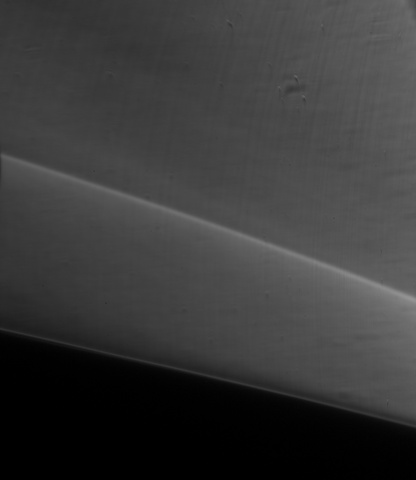

In [38]:
Image(filename='Average_Intensity_Map.jpg') 

# **Conclusion:** {-}

* The average intensity map of each frame of the schlieren video shows the mean location of the shock wave in the flow field. 
* This is also evident from the average intensity map that the average density gradient on the mean location is way higher than the rest of the flow field. (Hence, the pixels are brighter there.)
* The information regarding the variation of the location of the shock wave during the entire schlieren video is not prominent in the average intensity map.

\newpage

# **Question 3:** {-}

Generate a temporal standard deviation map of intensity. What can you infer from it?

# **Answer:** {-}

# **Code:** {-}

Creating the standard deviation map of intensity

In [24]:
STD_Map = np.std(Frames_Data,axis=2)

Saving the standard deviation map of intensity

In [25]:
cv2.imwrite("Temporal_Standard_Deviation_Map.jpg",STD_Map)

True

## **Temporal standard deviation map of the intensity of the schlieren video** {-}

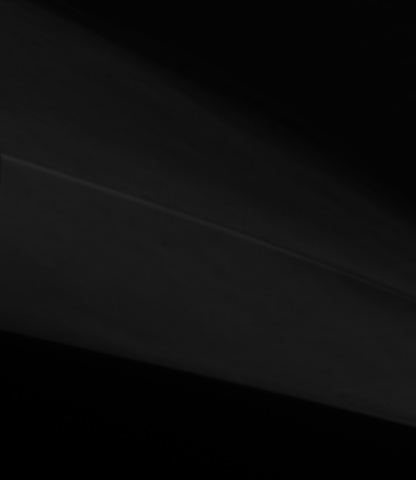

In [37]:
Image(filename='Temporal_Standard_Deviation_Map.jpg') 

# **Conclusion:** {-}

* The temporal standard deviation map of the intensity of the schlieren video helps visualize the variation of every pixel from the mean value of that pixel in the flow field.
* The temporal standard deviation map is comparatively darker in most of the regions of the flow field. So, the deviation of the flow field from the mean flow is very less.
* At the location of the mean shock wave the pixels are brighter than the rest of the flow field, indicating that there is a considerable deviation from the mean flow at the mean location of the shock wave.
* The information regarding the variation of the location of the shock wave during the entire schlieren video is more prominent in the temporal standard deviation map of the intensity as compared to the average intensity map.

\newpage

# **Question 4:** {-}

Work out a simple phase-averaging scheme and implement the same to generate a phase-averaged schlieren video that runs over one time period T. What can you infer from the phase-averaged data? Provide details of your scheme and implementation.

# **Answer:** {-}

For creating a phase-averaged video we averaged all the frames that are in the same phase during the oscillation and stacked those averaged frames consecutively to create a phase-averaged schlieren video from the given schlieren video.


# **Algorithm:** {-}

* **Step 1:** From the actual flow interval and the dominant time period. We find the number of the oscillations in the video
* **Step 2:** Then from the total number of frames in the given video, calculate the number of frames that belong to each oscillation.
* **Step 3:** Get the first frame of the first oscillation
* **Step 4:** Get all the in-phase to the first frame of all the oscillations and average them.
* **Step 5:** Repeat steps 3 and 4 for all the remaining frames in the first oscillation and store them in the same order.
* **Step 6:** The resulting video from these ordered frames is the phase-averaged schlieren video that runs over one time period T

# **Code:** {-}

Dominant Frequency

In [27]:
f1 = Dominant_Freq

Time associated with the dominant frequency

In [28]:
t1 = 1/f1

Number of the oscillations of dominant frequency in the video

In [29]:
Num_Oscillations_1 = round(Tv.max()/t1)

Number of the frames in each oscillation

In [30]:
Oscillation_Duration_NumFrame_1 = round(Num_Frames/Num_Oscillations_1)

Initializing the phase averaged output video

In [31]:
Frames_Data_Output_Phase_Averaged = np.zeros((size[1],size[0],3,Oscillation_Duration_NumFrame_1),dtype=np.uint8)

Declaring the output video

In [32]:
Phase_Average_Video_Name = "Output_Video_Phase"+'_'+str(round(f1))+'_Hz.mp4'
output_video_phase = cv2.VideoWriter(Phase_Average_Video_Name, cv2.VideoWriter_fourcc(*'mp4v'),fps, size)

Getting consecutive frames of the video in 1 time period (T)

In [33]:
for i in range(0,Oscillation_Duration_NumFrame_1,1):
    
    # Averaging the inphase frames of the video
    avg_frame = np.uint8(np.average(Frames_Data[:,:,i:i+Num_Frames:Oscillation_Duration_NumFrame_1],axis=2))
    
    # Converting grayscale image back to BGR format
    Frames_Data_Output_Phase_Averaged[:,:,:,i] = cv2.cvtColor(avg_frame,cv2.COLOR_GRAY2BGR)  
    
    # Writing the frame as output video
    output_video_phase.write(Frames_Data_Output_Phase_Averaged[:,:,:,i])

In [34]:
print("Phase-averaged schlieren video should be generated.")
print(f"Name of the video file {Phase_Average_Video_Name}")

Phase-averaged schlieren video should be generated.
Name of the video file Output_Video_Phase_192_Hz.mp4


# **Conclusion:** {-}

* The phase-averaged video of the flow field shows us the variations of the shock wave during one cycle of a dominant time period. 
* From the phase-averaged video, we can also infer changes in the shock wave angle during the different phases of the one complete cycle. 
* The average intensity map during the different phases of the one complete cycle can also be inferred from this video. So, we are getting the average change in density gradient at different locations of the flow field during different phases of one complete cycle.